In [2]:
import pandas as pd
import numpy as np
import pdfplumber
import os
import re

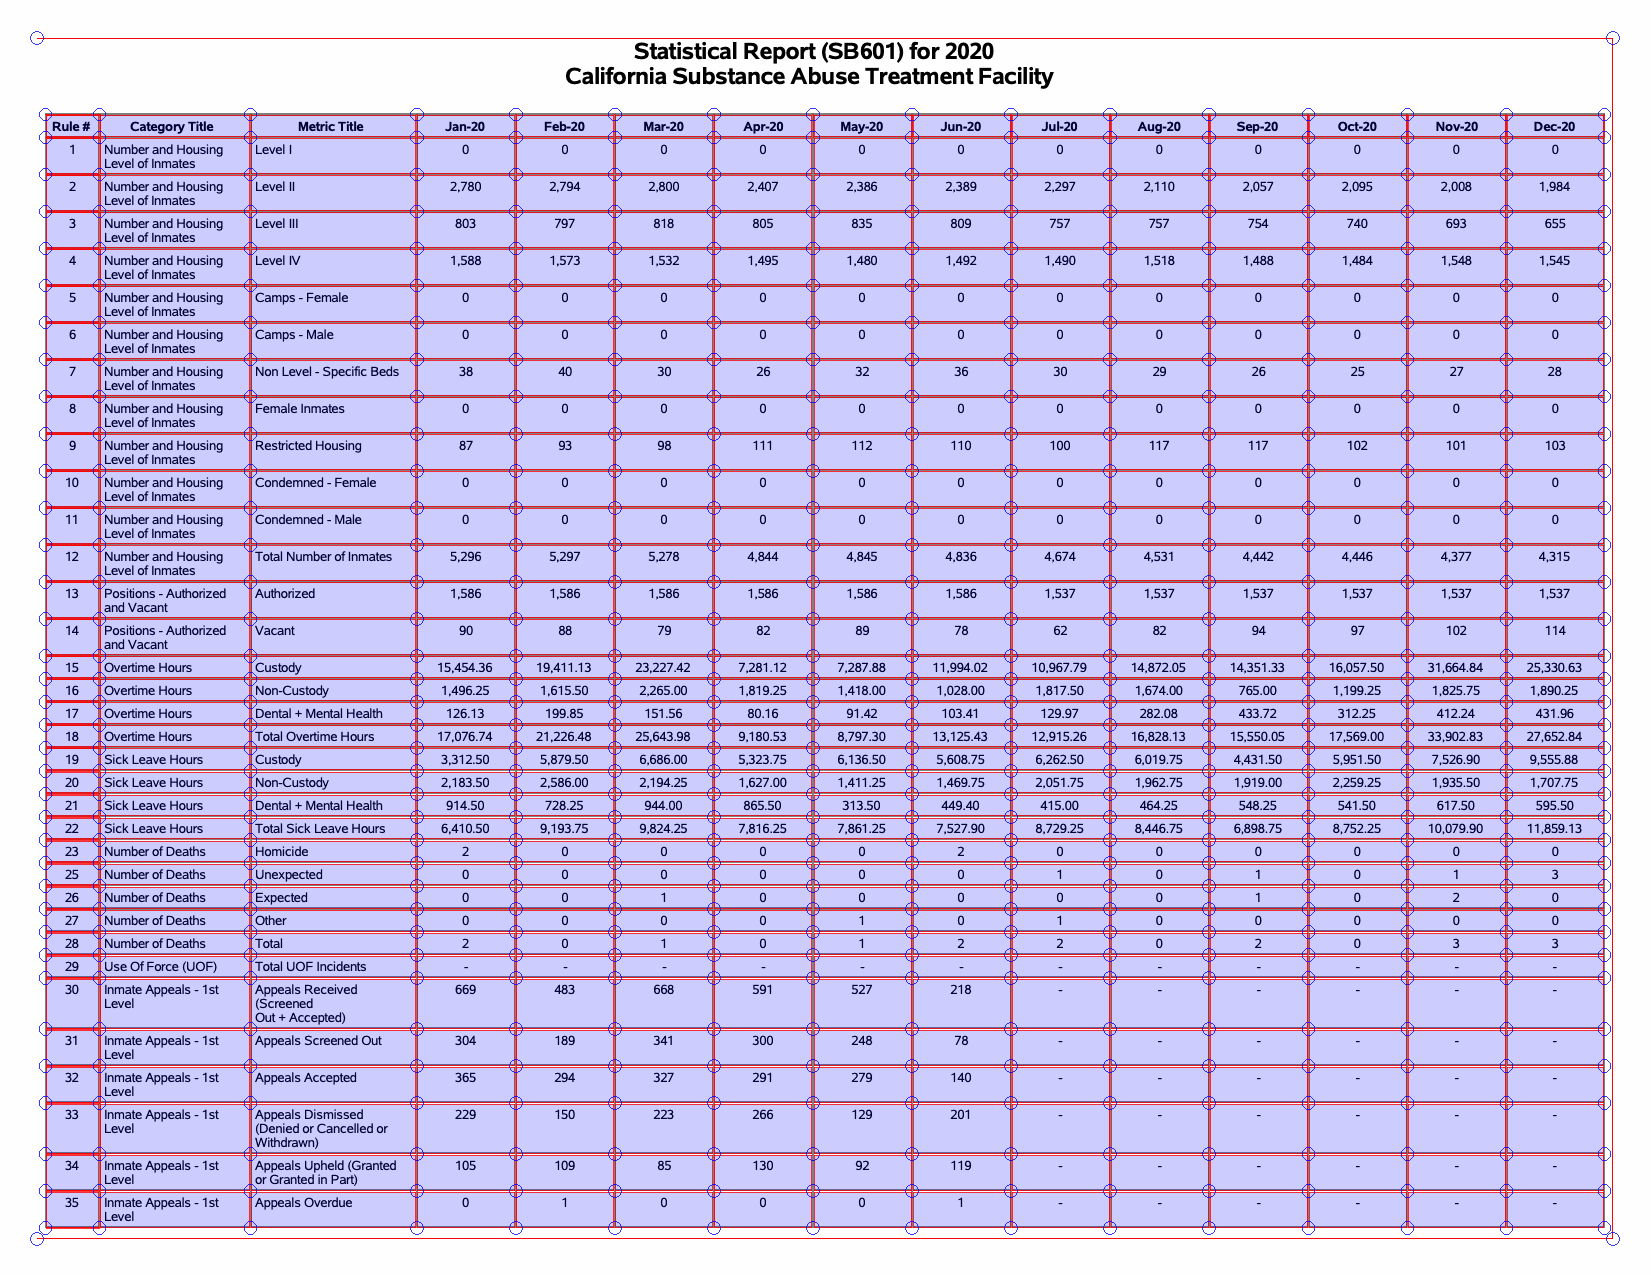

In [12]:
#Try one sample to check table finder from PDFPlumber https://github.com/jsvine/pdfplumber
pdf_name = "pdfs-2020-to-2021/2020-SATF-SB601.pdf"

pdf  = pdfplumber.open(pdf_name)
page = pdf.pages[0]
image = page.to_image(resolution=150)
image.reset().debug_tablefinder()

In [8]:
page.extract_table()

[['Rule #',
  'Category Title',
  'Metric Title',
  'Jan-20',
  'Feb-20',
  'Mar-20',
  'Apr-20',
  'May-20',
  'Jun-20',
  'Jul-20',
  'Aug-20',
  'Sep-20',
  'Oct-20',
  'Nov-20',
  'Dec-20'],
 ['1',
  'Number and Housing\nLevel of Inmates',
  'Level I',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['2',
  'Number and Housing\nLevel of Inmates',
  'Level II',
  '2,078',
  '2,050',
  '2,009',
  '2,018',
  '2,131',
  '2,102',
  '2,035',
  '2,164',
  '2,126',
  '2,098',
  '2,040',
  '1,971'],
 ['3',
  'Number and Housing\nLevel of Inmates',
  'Level III',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['4',
  'Number and Housing\nLevel of Inmates',
  'Level IV',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['5',
  'Number and Housing\nLevel of Inmates',
  'Camps - Female',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['6',
  'N

In [40]:
columns = [
  'Institution',
  'Year',  
  'Category',
  'Metric Title',
  'Jan',
  'Feb',
  'Mar',
  'Apr',
  'May',
  'Jun',
  'Jul',
  'Aug',
  'Sep',
  'Oct',
  'Nov',
  'Dec'
]

institution_codes = {
    "California City Correctional Facility" : "CAC",
    "California Correctional Institutioin" : "CCI",
    "California State Prison, Corcoran" : "COR",
    "High Desert State Prison" : "HDSP",
    "Kern Valley State Prison" : "KVSP",
    "California State Prison, Los Angeles County" : "LAC",
    "Pelican Bay State Prison" : "PBSP",
    "California State Prison, Sacramento" : "SAC",
    "California Substance Abuse Treatment Facility" : "SATF",
    "Salinas Valley State Prison": "SVSP"
}

df = pd.DataFrame()

pdf_files = sorted((f for f in os.listdir("pdfs-2020-to-2021") if not f.startswith(".")), key=str.lower)

def parse_value(x):
    if x == "": return np.nan
    return x.replace(",", "").replace('\n',' ')
    
def parse_row(row,year):
    row_builder = {columns[i + 2]:parse_value(cell) for i, cell in enumerate(row[2:14])}
    row_builder['Institution'] = row[0]
    return row_builder

for pdfs in pdf_files:
    pdf   = pdfplumber.open("pdfs-2020-to-2021/" + pdfs)
    page  = pdf.pages[0]
    table = page.extract_table()
    institution = re.sub(r'^\d{4}-([A-Z]{3,4})-.*$', r'\1', pdfs)
    year = re.sub(r'^(\d{4})-.*?$', r'\1', pdfs)

    for row in table[1:]:
        row_builder = {'Institution': institution, 'Year': year}
        for i, cell in enumerate(row[1:]):
            row_builder[columns[i+2]] = parse_value(cell)

        df = pd.concat([df, pd.DataFrame([row_builder])], ignore_index=True)

df

,Institution,Year,Category,Metric Title,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,SATF,2020,Number and Housing Level of Inmates,Level I,0,0,0,0,0,0,0,0,0,0,0,0
1,SATF,2020,Number and Housing Level of Inmates,Level II,2780,2794,2800,2407,2386,2389,2297,2110,2057,2095,2008,1984
2,SATF,2020,Number and Housing Level of Inmates,Level III,803,797,818,805,835,809,757,757,754,740,693,655
3,SATF,2020,Number and Housing Level of Inmates,Level IV,1588,1573,1532,1495,1480,1492,1490,1518,1488,1484,1548,1545
4,SATF,2020,Number and Housing Level of Inmates,Camps - Female,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,CAC,2020,Inmate Appeals - 1st Level,Appeals Upheld (Granted or Granted in Part),7,8,3,8,0,8,-,-,-,-,-,-
649,CAC,2020,Inmate Appeals - 1st Level,Appeals Overdue,0,0,0,0,0,0,-,-,-,-,-,-
650,CAC,2020,Inmate Appeals - 2nd Level,Appeals Received (Screened Out + Accepted),46,30,34,45,28,10,-,-,-,-,-,-
651,CAC,2020,Inmate Appeals - 2nd Level,Appeals Screened Out,5,6,7,7,6,2,-,-,-,-,-,-


In [43]:
df_filtered = df[(df['Metric Title'] == 'Total Number of Inmates') | (df['Metric Title'] == 'Total UOF Incidents')]
df_filtered.head()

,Institution,Year,Category,Metric Title,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
11,SATF,2020,Number and Housing Level of Inmates,Total Number of Inmates,5296,5297,5278,4844,4845,4836,4674,4531,4442,4446,4377,4315
27,SATF,2020,Use Of Force (UOF),Total UOF Incidents,-,-,-,-,-,-,-,-,-,-,-,-
45,CAC,2021,Number and Housing Level of Inmates,Total Number of Inmates,1991,1919,1840,1987,2001,2088,2054,2113,2119,2091,2130,2154
60,CAC,2021,Use of Force (UOF),Total UOF Incidents,6,2,4,10,2,2,9,6,4,11,6,1
80,KVSP,2020,Number and Housing Level of Inmates,Total Number of Inmates,3553,3512,3602,3534,3645,3700,3580,3520,3515,3623,3643,3617


In [45]:
df_melted = df_filtered.melt(id_vars=['Institution', 'Year', 'Category', 'Metric Title'], var_name='Month', value_name='Value')
df_melted.head()

,Institution,Year,Category,Metric Title,Month,Value
0,SATF,2020,Number and Housing Level of Inmates,Total Number of Inmates,Jan,5296
1,SATF,2020,Use Of Force (UOF),Total UOF Incidents,Jan,-
2,CAC,2021,Number and Housing Level of Inmates,Total Number of Inmates,Jan,1991
3,CAC,2021,Use of Force (UOF),Total UOF Incidents,Jan,6
4,KVSP,2020,Number and Housing Level of Inmates,Total Number of Inmates,Jan,3553


In [47]:
df_UOF = df_melted[df_melted['Metric Title'] == 'Total UOF Incidents']
df_POP = df_melted[df_melted['Metric Title'] == 'Total Number of Inmates']

df_combined = df_UOF.merge(df_POP, how='inner', on=['Institution','Year','Month'])
df_combined.head()

,Institution,Year,Category_x,Metric Title_x,Month,Value_x,Category_y,Metric Title_y,Value_y
0,SATF,2020,Use Of Force (UOF),Total UOF Incidents,Jan,-,Number and Housing Level of Inmates,Total Number of Inmates,5296
1,CAC,2021,Use of Force (UOF),Total UOF Incidents,Jan,6,Number and Housing Level of Inmates,Total Number of Inmates,1991
2,KVSP,2020,Use Of Force (UOF),Total UOF Incidents,Jan,-,Number and Housing Level of Inmates,Total Number of Inmates,3553
3,PBSP,2020,Use Of Force (UOF),Total UOF Incidents,Jan,-,Number and Housing Level of Inmates,Total Number of Inmates,2648
4,SVSP,2020,Use Of Force (UOF),Total UOF Incidents,Jan,-,Number and Housing Level of Inmates,Total Number of Inmates,2921


In [49]:
df_finished = df_combined.drop(['Category_x','Category_y','Metric Title_x','Metric Title_y'], axis=1).rename(columns={'Value_x':'Use of Force', 'Value_y': 'Inmate Count'})
df_finished.head(10)

,Institution,Year,Month,Use of Force,Inmate Count
0,SATF,2020,Jan,-,5296
1,CAC,2021,Jan,6,1991
2,KVSP,2020,Jan,-,3553
3,PBSP,2020,Jan,-,2648
4,SVSP,2020,Jan,-,2921
5,SVSP,2021,Jan,35,2885
6,CCI,2021,Jan,18,2929
7,KVSP,2021,Jan,45,3629
8,SATF,2021,Jan,16,4323
9,HDSP,2020,Jan,-,3161


In [50]:
df_finished.to_csv("finished-csvs/finished-2020-2021.csv", encoding="utf-8", index=False)